# PyTorch Neural Network Classification
* Notebook coded by Adam Lang as part of the `Deep Learning with PyTorch bootcamp` with Professor Daniel Bourke.
* Date: 3/12/2024

## What is Classification
* Predicting or classifying if something is 1 thing or another.

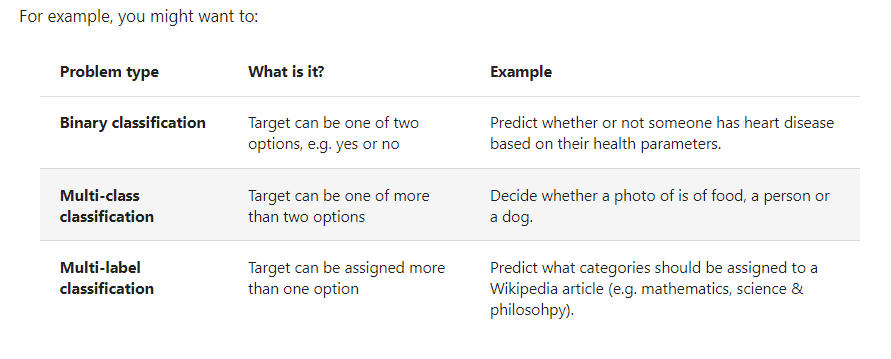

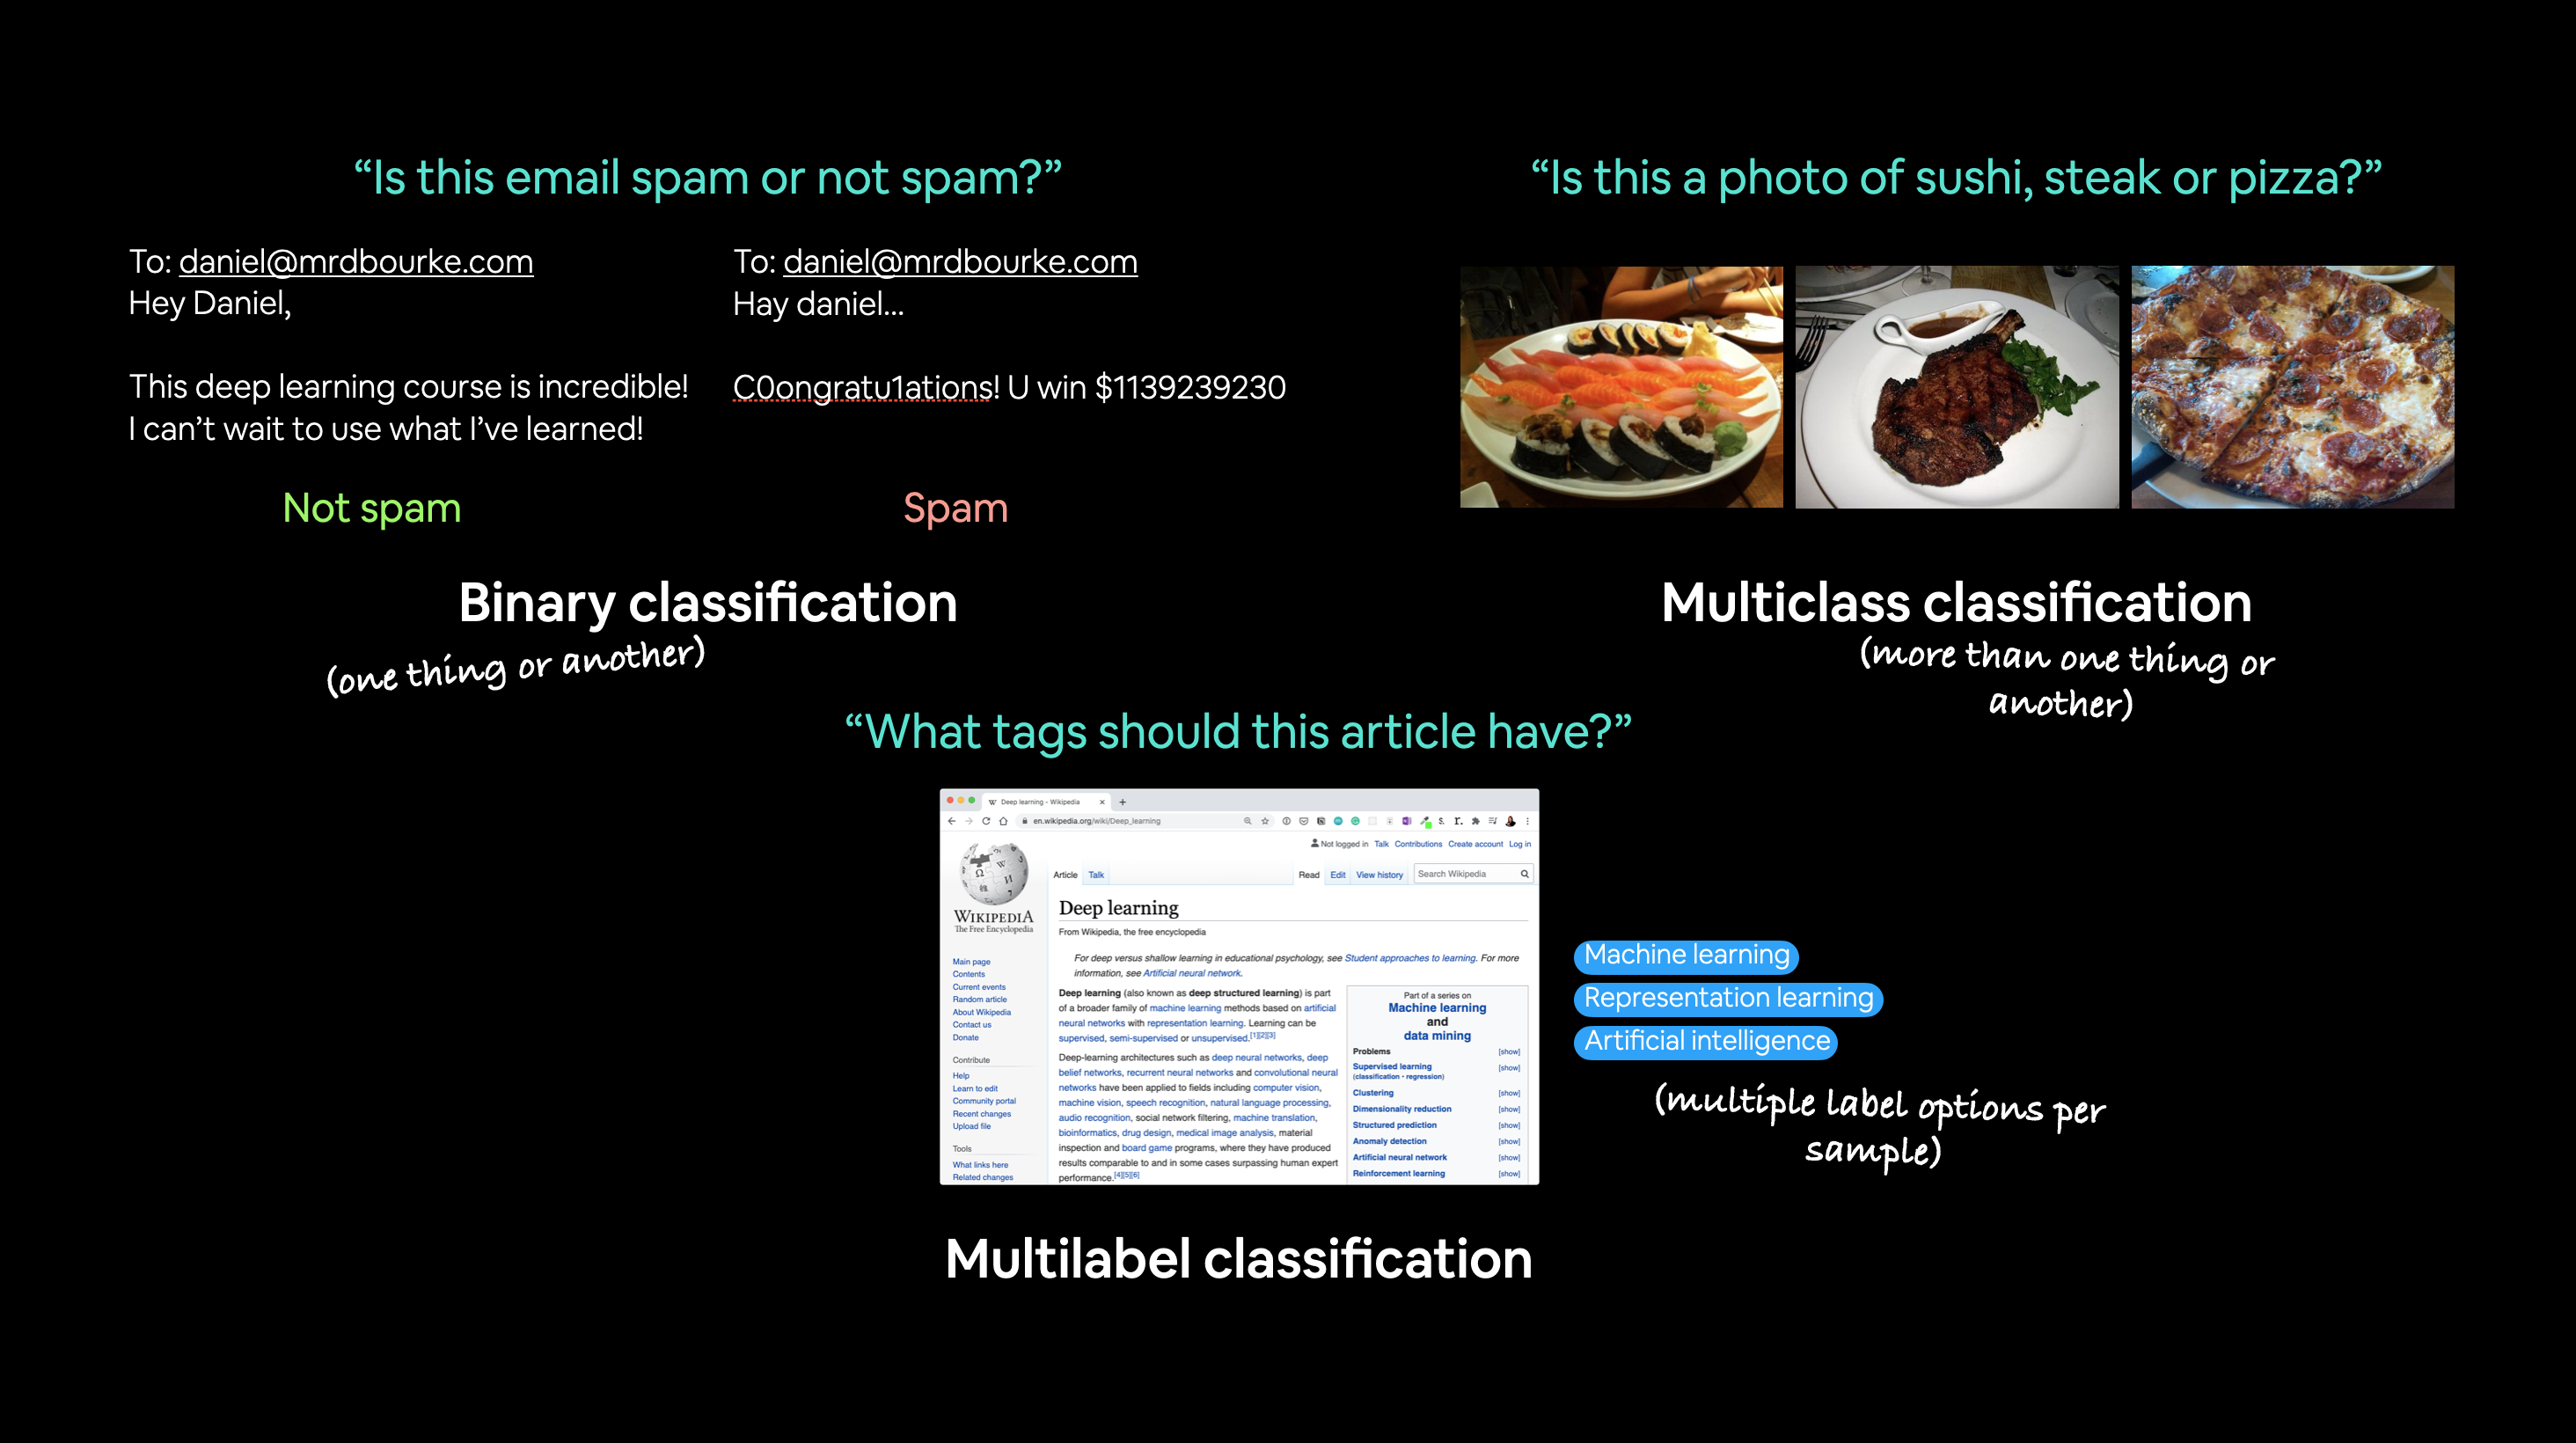

## Classification inputs and outputs
1. inputs
  * numerical encoding (matrices or tensors)
2. machine learning algorithm

3. outputs
  * predicted output
  * actual output

## Input and Output Shapes
* (example: for image classification)
* Output shape = 3 as we have 3 classes we are classifying
* Output shape depends on the classification task(s).
* Below example we see there are 3 classes we are trying to predict thus the output shape is 3.

image.png




## Typical Architecture of Neural Network Classification
* Example below we see 3 output classes (sushi, steak or pizza)

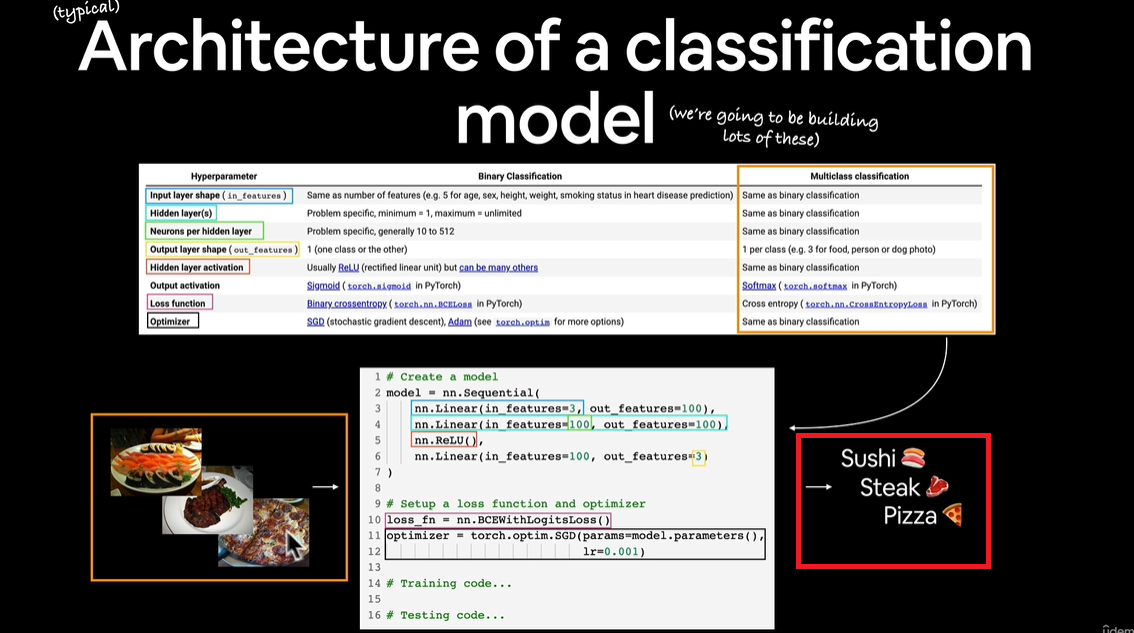


# Neural Network Classification with PyTorch - Code Implementations

* Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).

## 1. Make classification data and get it ready
* we will use `sklearn` library from python

In [ ]:
import sklearn

In [ ]:
# let's use the make_circles dataset
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03, #randomness
                    random_state=42
                    )

In [ ]:
# len of X, y
len(X), len(y)

(1000, 1000)

In [ ]:
# let's look at the first 5 samples of X and y
print(f"First 5 samples of X:\n {X[:5]}\n")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# look at all of y
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

summary: this is `binary classification` as we have 2 classes 0 or 1

In [ ]:
# let's make a dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})


# head
circles.head(10)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0

In [ ]:
## quick data analysis of our dataframe
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [ ]:
!pip install cmap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.1/614.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Visualize, viz, viz
import matplotlib.pyplot as plt
from matplotlib import cm
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y);

Note: The data we're working with is often referred to as a `toy dataset` which is small enough to experiment but still sizeable enough to practice fundamentals.

### 1.1 Check input and output shapes
* Some of most common errors are mismatches in the input/output shapes of arrays, matrices and tensors.

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

This is an array not a tensor, to work in PyTorch we want to use Tensors.

In [ ]:
# View first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


summary:
* This tells us that we need 2 features of X to predict 1 target y.

### 1.2 Turn data into tensors and create train and test splits

In [ ]:
# Turn data into tensors
import torch
torch.__version__

'2.2.1+cu121'

In [ ]:
# what is X
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

* Above we can see that `X` is a numpy array, we need it to be a tensor.
* We can also see the default dtype for numpy is a `float64`.

In [ ]:
# Turn data into tensors - X is a numpy array need to turn into a pytorch tensor which is float 32
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# first 5 values
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# check dtypes
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #0.2 = 20% of data will be test & 80% will be train
                                                    random_state=42)# equivalent to torch.manual_seed() for code reproducibility)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn


#Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we'e setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and sent it to the target `device`

In [ ]:
## what is X_train
X_train.shape

torch.Size([800, 2])

This means we have 800 total samples with 2 inside each tensor row

In [ ]:
## 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # takes in 5 features from previous layer and outputs a single feature (same shape as y)

    #self.two_linear_layers = nn.Sequential(
       #nn.Linear(in_features=2, out_features=5),
       #nn.Linear(in_features=5, out_features=1))

    # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
## check device
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
## Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)


# print model_0
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5759, -0.3574],
                      [-0.2998,  0.0273],
                      [-0.2606, -0.4783],
                      [-0.1389,  0.5575],
                      [ 0.2459,  0.1699]])),
             ('0.bias', tensor([-0.4165, -0.4371, -0.4127,  0.0740,  0.0461])),
             ('1.weight',
              tensor([[ 0.2407, -0.0995,  0.2708,  0.3151, -0.4404]])),
             ('1.bias', tensor([-0.3348]))])

In [ ]:
# Make predictions with model
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-1.],
        [-1.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-1.],
        [-1.],
        [-0.],
        [-1.]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
## look at X_test, y_test
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again...this is problem specific.

* For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

* For classification you might want binary cross entropy or categorical cross entropy.

* As a reminder, the loss function measures how wrong your models predictions are. reference: https://www.learnpytorch.io/02_pytorch_classification/#21-setup-loss-function-and-optimizer

image.png

### What is a logits layer in deep learning?
* A logits layer feeds into softmax or other normalization layer.
* The output of the softmax is the probabilities for the classification task + the inputs to the logits layer.
    * Logits layer usually produces values from -infinity to +infinity
    * Softmax layer transforms these logit values from 0 to 1.

### Optimizers - what are most common?
* 2 most common are:
1. SGD
2. Adam
* PyTorch has many built-in optimizers (`torch.optim`): https://pytorch.org/docs/stable/optim.html#module-torch.optim
* For the loss function we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [ ]:
# setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through sigmoid activation function prior to input to BCELoss

## This is a 2 layer approach to building this
#nn.Sequential(
 #   nn.Sigmoid(),
  #  nn.BCELoss() )

## This is a 1 layer approach with the built-in PyTorch function nn.BCEWithLogitsLoss()
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in => 1 layer

## set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1 #set learning rate
                            )

In [ ]:
# calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
# get the state_dict of the model
# model_0.state_dict()

## 3. Train model

To train our model, we're going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the 'argmax()`.

In [ ]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

# print y_logits
y_logits

tensor([[-0.5602],
        [-0.6139],
        [-0.4253],
        [-0.5984],
        [-0.4348]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

summary:
* we need our data in the same format as y_test.
* Therefore we are going to use the sigmoid activation function to normalize our values between 0 and 1.

In [ ]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3635],
        [0.3512],
        [0.3952],
        [0.3547],
        [0.3930]])

summary:
* Now we are able to pass the properly handle the `y_pred_probs` after putting them through the `torch.sigmoid()` activation function.
* The prediction probabilities for a binary classification problem should be between 0 and 1.

For our prediction probability values, we need to perform a range-style rounding on them, so if:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
    * or if:
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the predicted labels: raw logits => prediction probabilities => prediction labels

# Turn y_pred_probs => y_preds
y_preds = torch.round(y_pred_probs)

# Full step => create label
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5])) # 5 examples

# Check for equality using `torch.eq`
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [ ]:
# view y_test labels
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a Training and Testing Loop

FYI there are multiple types of random seeds:
* `torch.manual_seed`
* `torch.cuda.manual_seed` (see documentation: https://pytorch.org/docs/stable/generated/torch.cuda.manual_seed.html)

In [ ]:
# set a manual seed for reproducibility
torch.manual_seed(42)
# if using cuda - torch.cuda.manual_seed(42)


# set the number of epochs
epochs = 100

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and eval loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probs as input - this is why you need `torch.sigmoid()` on logits
  #               y_train)

  ## use this one - our loss function is BCEWithLogitsLoss
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (update parameters - gradient descent)
  optimizer.step()



  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.72541, Acc: 50.00% | Test loss: 0.71991, Test acc: 50.00%
Epoch: 10 | Loss: 0.70528, Acc: 50.00% | Test loss: 0.70229, Test acc: 50.00%
Epoch: 20 | Loss: 0.69776, Acc: 50.00% | Test loss: 0.69606, Test acc: 50.00%
Epoch: 30 | Loss: 0.69492, Acc: 50.00% | Test loss: 0.69396, Test acc: 50.00%
Epoch: 40 | Loss: 0.69383, Acc: 50.00% | Test loss: 0.69335, Test acc: 50.00%
Epoch: 50 | Loss: 0.69341, Acc: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 60 | Loss: 0.69324, Acc: 43.12% | Test loss: 0.69331, Test acc: 44.00%
Epoch: 70 | Loss: 0.69315, Acc: 48.50% | Test loss: 0.69341, Test acc: 45.50%
Epoch: 80 | Loss: 0.69311, Acc: 48.38% | Test loss: 0.69352, Test acc: 50.00%
Epoch: 90 | Loss: 0.69309, Acc: 49.62% | Test loss: 0.69362, Test acc: 49.00%


Explanation:
* If we recall above, the original dataframe was 500 samples of each color, then we split it 70/30. Thus the model is guessing the output. The dataset is also balanced completely which explains this.
* Thus, the test accuracy results are at or near 50% is basically a "coin flip" - heads or tails.

## 4. Make predictions and evaluate the model

From the metrics it looks like our model is not learning anything.....

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, Visualize, Visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path # allows us to create file paths

# download helper functions from learn PyTorch repo (if not already downloaded - if else)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
# same for testing data
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Summary:
* The model is using a straight line decision boundary.

## 5. Improving a model (from a model perspective)
* Add more layers - give model more chances to learn about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units.
* Fit for longer (give model more chance to learn)
* Changing activation functions (put them in the model!)
* Change the learning rate
* Change the loss function

**These options are all from a model's perspective because they deal directly with the model rather than the data.**

And because these options are all values we (as machine learning and engineers and data scientists) can change, they are referred to as **hyperparameters**.

image.png


### Model Improvement Tasks
* We will try and improve the model by:
1. Adding more hidden units: 5 -> 10
2. Increase the number of layers: 2 -> 3
3. Increase the number of epochs: 100 -> 1000

* Problem with the approach above?
  * From a scientific or machine learning approach, it is not practical to change all 3 at the same time.
  * It is **best practice** to change 1 or 2 at a time and iterate over them, analyze the results and try again.
  * ***Experiment Tracking*** is important (track your results).


In [ ]:
# print X_train sample
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

note: 2 features in X_train

In [ ]:
# print sample of y_train
y_train[:5]

tensor([1., 0., 0., 0., 1.])

note: y_train is 1 number (1 feature)

### in_features vs. out_features
* in and out features are one of the most important aspects of deep learning and NN training.
* As seen above, we have 2 in and 1 out.

In [ ]:
# create circle modelV1
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10) #in is 2 as X_train has 2 features
    self.layer_2 = nn.Linear(in_features=10, out_features=10) #10 is the out from the previous NN layer => becomes in of next layer
    self.layer_3 = nn.Linear(in_features=10, out_features=1) #final out_features is 1 => y_train is 1 number

# implement a forward method to NN - z is the logits
  def forward(self, x):
    # z = self.layer_1(x) ## this is a cumbersome way to do this, but good to know
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # return in descending order of NN layers: 1 -> 2 -> 3, this leverages speedups where possible under the hood


# create instance of CircleModelV1
model_1 = CircleModelV1().to(device)
# output model_1
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Summary: Now we have an updated model

In [ ]:
#  before we optimized our model
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

#### Now if we look at the new `model_1.state_dict()` below we can see the added features

In [ ]:
##look at state_dict
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

## Preparing to write training and testing code for new model_1

In [ ]:
# create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

## Write a new training and testing loop

In [ ]:
# Write training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set up epochs - train for longer
epochs = 1000

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Training and testing loop
for epoch in range(epochs):
  ### Training
  model_1.train()
  #1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> pred labels

  #2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backpropagation)
  loss.backward()

  #5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


summary:
* We just trained for 1000 epochs and the model accuracy is still basically 50/50?!

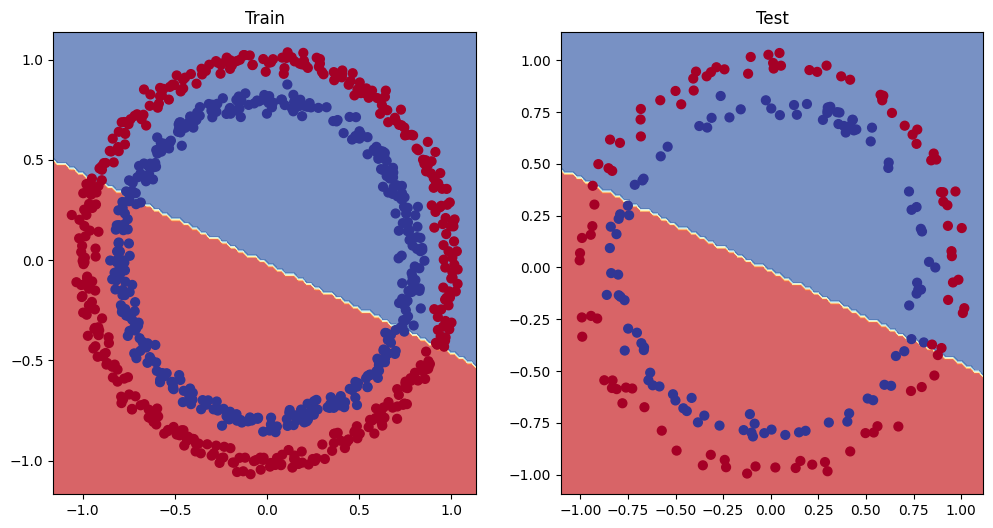

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

**Machine Learning Trick:** One way to troubleshoot a larger problem is to test out a smaller problem (using same or new/different data).

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8* len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

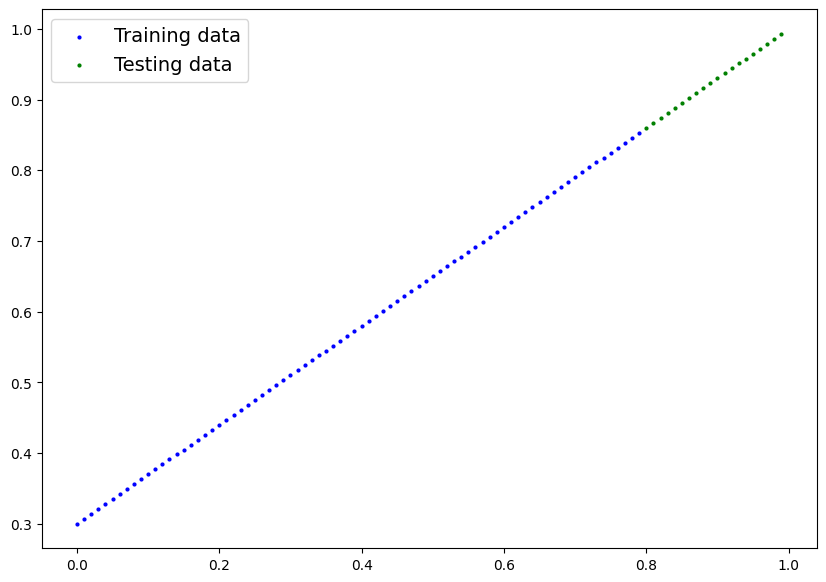

In [ ]:
# use plot_predictions helper function
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [ ]:
# print model_1
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# same architecture as model_1 but using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

#### Reminder:
* `nn.Linear` applies a linear transformation to our data:
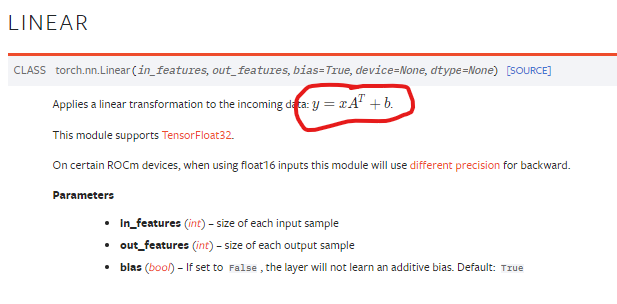

In [ ]:
## build loss and optimizer
## use L1 loss for regression problem
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01) # learning rate of each epoch

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


# training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

# print out whats happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test_loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test_loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test_loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test_loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test_loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test_loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test_loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test_loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test_loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test_loss: 0.00360


In [ ]:
# Turn on evaluation model
model_2.eval()

# make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# plot data and predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite amount (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

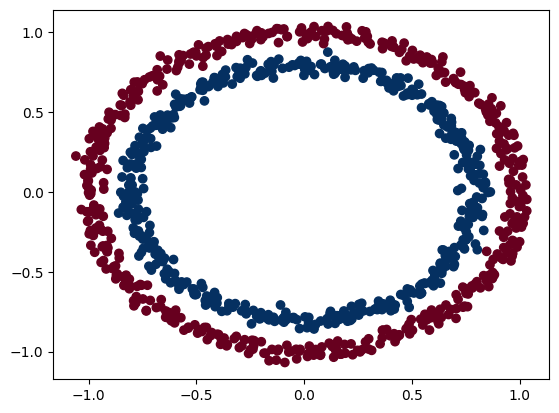

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors from numpy arrays
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear = straight lines
* Non-linear = non-straight lines

Artificial neural networks are a large combination of linear and non-linear functions that are potentially able to find patterns in data.

In [ ]:
# Build model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #relu is non-linear activation function

  def forward(self, x):
    # where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


# instantiate model 3
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.01)

### 6.3 Train a model with non-linearity

In [ ]:
len(X_test), len(y_test)

(200, 200)

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device - device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# loop through data
epochs = 1000

for epoch in range(epochs):
### Training
  model_3.train()

  # 1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # logits -> pred prob -> pred labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimzer zero grad - zero gradients of optim
  optimizer.zero_grad()

  # 4. loss backward - back propagation
  loss.backward()

  # 5. step the optimizer - gradient descent
  optimizer.step()


  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6925, Acc: 50.38% | Test Loss: 0.6926, Test Acc: 50.00%
Epoch: 200 | Loss: 0.6922, Acc: 59.00% | Test Loss: 0.6923, Test Acc: 56.00%
Epoch: 300 | Loss: 0.6921, Acc: 70.12% | Test Loss: 0.6921, Test Acc: 67.00%
Epoch: 400 | Loss: 0.6919, Acc: 68.38% | Test Loss: 0.6920, Test Acc: 70.00%
Epoch: 500 | Loss: 0.6918, Acc: 58.50% | Test Loss: 0.6918, Test Acc: 62.00%
Epoch: 600 | Loss: 0.6917, Acc: 54.00% | Test Loss: 0.6916, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6915, Acc: 53.25% | Test Loss: 0.6915, Test Acc: 53.00%
Epoch: 800 | Loss: 0.6914, Acc: 52.62% | Test Loss: 0.6913, Test Acc: 53.00%
Epoch: 900 | Loss: 0.6913, Acc: 52.75% | Test Loss: 0.6912, Test Acc: 53.00%


In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5301,  0.5822],
                      [-0.1686,  0.6543],
                      [-0.1549,  0.1427],
                      [-0.3611,  0.4465],
                      [ 0.6361, -0.5373],
                      [ 0.6067,  0.1332],
                      [ 0.5364,  0.0929],
                      [ 0.3410, -0.0998],
                      [ 0.5489,  0.1146],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3377, -0.0744, -0.2872,  0.4463, -0.5417, -0.3285, -0.1967, -0.4252,
                       0.0676, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2733, -0.2791,  0.2441,  0.0508, -0.1129,  0.1873,  0.0414,  0.2555,
                        0.0256, -0.0997],
                      [ 0.1157, -0.0595,  0.1331,  0.2870,  0.2084, -0.1178,  0.2023,  0.0566,
                        0.1829, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural networks rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the best patterns on its own.

What are these tools?
1. Linear functions
2. Non-linear functions

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

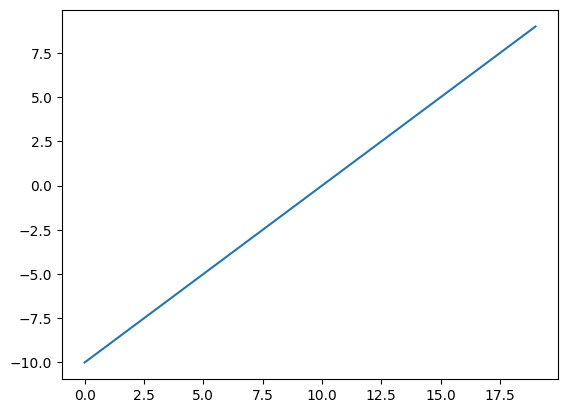

In [ ]:
# visualize the tensor
plt.plot(A);

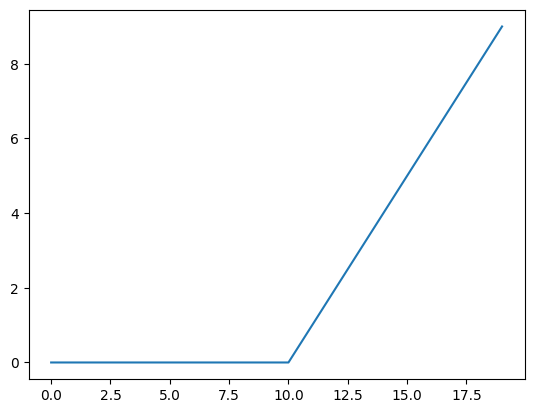

In [ ]:
# plot torch.relu
plt.plot(torch.relu(A));

In [ ]:
# create a relu function with type hint
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors


# print relu(A)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

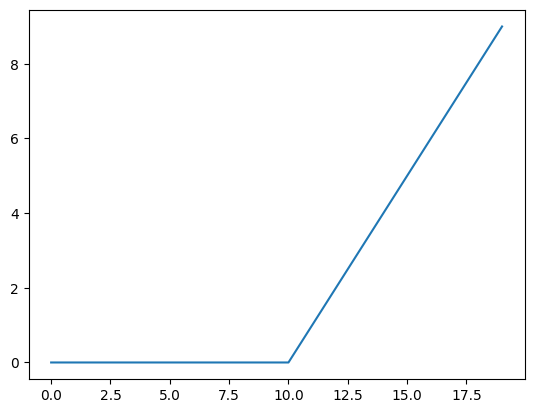

In [ ]:
# Plot ReLU activation function
plt.plot(relu(A));

In [ ]:
# lets do same for sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

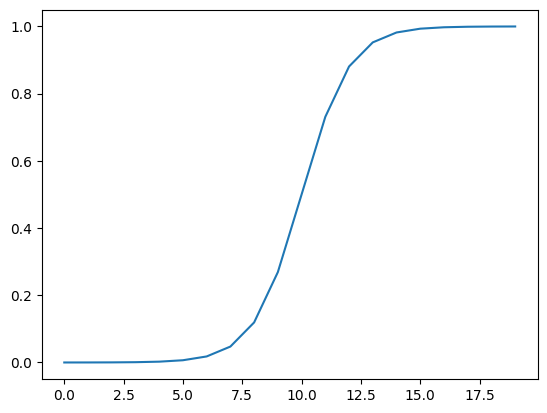

In [ ]:
plt.plot(torch.sigmoid(A));

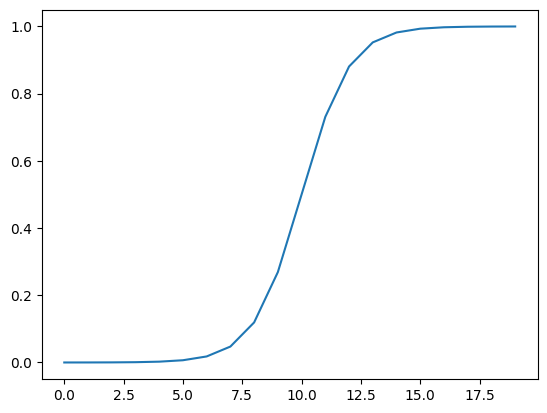

In [ ]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than 1 thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi-class dataset

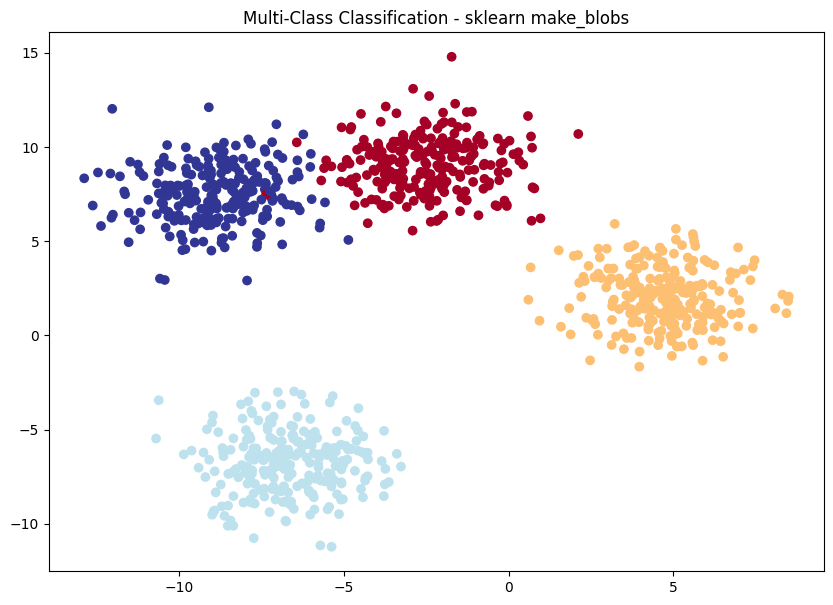

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give clusters shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.20,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
_ = plt.figure(figsize=(10,7))
_ = plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
_ = plt.title('Multi-Class Classification - sklearn make_blobs')

### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8): #present hidden_units to 8
    """Initializes multi-class classification model

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

      Returns:

      Example:
      """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features))

  def forward(self, x):
      return self.linear_layer_stack(x)

# Create instance of blob model and send to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## Experiment - Remove non-linear layers from NN model to test multi-class classification boundaries
* Remove ReLU

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8): #present hidden_units to 8
    """Initializes multi-class classification model

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

      Returns:

      Example:
      """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features))

  def forward(self, x):
      return self.linear_layer_stack(x)

# Create instance of blob model and send to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# print out shapes
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification - loss function measures how wrong model preds are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification - updates model parameters to try and reduce loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is hyperparameter you can change!

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train/test our model we need to convert our models outputs (logits) to prediction probabilities then to prediction labels.

Logits (raw output of the model) -> pred probs (use `torch.softmax` activation function) -> pred labels (take argmax of prediction probabilities)

To convert Logits -> pred probs we need an activation function

In [ ]:
# let's get raw outputs of model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

Note:
* Values in the tensor above are the logits.

##### Reminder - What are logits?
* Outputs of a neural network before the activation function is applied.

In [ ]:
# Convert our models logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


note:
* tensor above columns are the 4 multi-class classification classes


In [ ]:
# convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a training loop and testing loop for a multi-class PyTorch model

In [ ]:
print(type(y_blob_train))

<class 'torch.Tensor'>


In [ ]:
# Fit the multi class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 100

# put data to the target device
X_blob_train, y_blob_train, = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop through data
for epoch in range(epochs):
  ### Training
  ### model.train()
  model_4.train()

  ### Do the forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # calculate loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  ### optimizer zero_grad after forward pass
  optimizer.zero_grad()

  ### loss backwards (backward propagation)
  loss.backward()

  ### optimizer step (gradient descent)
  optimizer.step()


  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)


    # calculate test loss/loss func
    test_loss = loss_fn(test_logits, y_blob_test)

    # calculate test acc
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

    # print out whats happenin!
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test_acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 1.0432, Acc: 65.50% | Test loss: 0.5786, Test_acc: 95.50%
Epoch: 10 | Loss: 0.1440, Acc: 99.12% | Test loss: 0.1304, Test_acc: 99.00%
Epoch: 20 | Loss: 0.0806, Acc: 99.12% | Test loss: 0.0722, Test_acc: 99.50%
Epoch: 30 | Loss: 0.0592, Acc: 99.12% | Test loss: 0.0513, Test_acc: 99.50%
Epoch: 40 | Loss: 0.0489, Acc: 99.00% | Test loss: 0.0410, Test_acc: 99.50%
Epoch: 50 | Loss: 0.0429, Acc: 99.00% | Test loss: 0.0349, Test_acc: 99.50%
Epoch: 60 | Loss: 0.0391, Acc: 99.00% | Test loss: 0.0308, Test_acc: 99.50%
Epoch: 70 | Loss: 0.0364, Acc: 99.00% | Test loss: 0.0280, Test_acc: 99.50%
Epoch: 80 | Loss: 0.0345, Acc: 99.00% | Test loss: 0.0259, Test_acc: 99.50%
Epoch: 90 | Loss: 0.0330, Acc: 99.12% | Test loss: 0.0242, Test_acc: 99.50%


Summary of results so far:
* Loss has gone down
* Accuracy has gone up!

### 8.6 Making and evaluating predictions with a PyTorch multi-class model
* Make predictions using Logits - why?
* Logits are the raw outputs of our model!

In [ ]:
# make predictions using logits]
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test) # pass test data to our model

# View first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

In [ ]:
# Go from logits to predicton probs
y_pred_probs = torch.softmax(y_logits, dim=1) #across 1st dim
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4287e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8303e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0767e-09, 2.0006e-04]])

In [ ]:
# what is y_blob_test?
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [ ]:
# go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# compare to y_blob_test
y_blob_test


tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

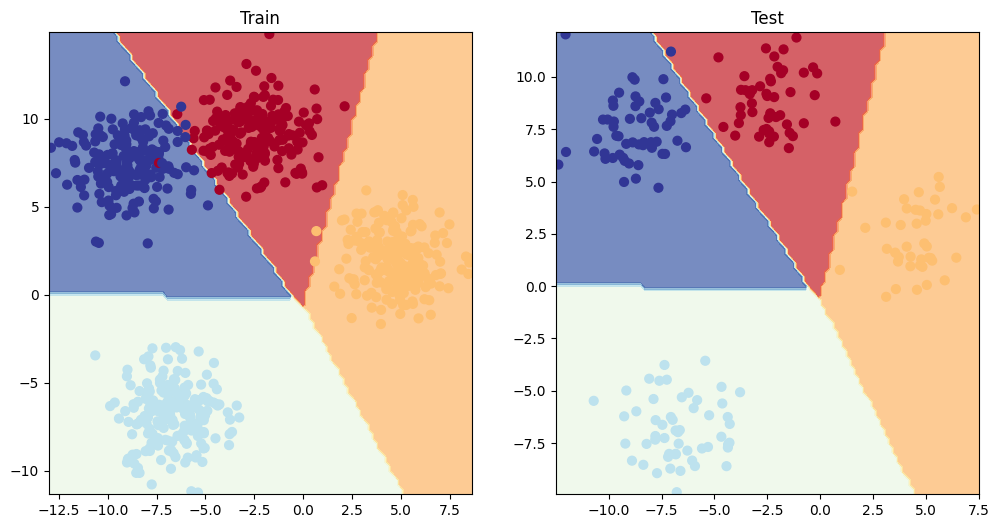

In [ ]:
## plot this
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

Discussion of results:
* We were able to train a multi-class classification machine learning model in PyTorch.
* Interesting observation is that whether you use the non-linear layers (ReLU) or all linear layers (outcome seen above in plots), **Data is linearly separable so results are similar.**

## 9. A few more classification metrics....(To evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
  * Better with balanced classes.
  * `torchmetrics.Accuracy()` or
  * `sklearn.metrics.accuracy_score()`
* Precision - better with imbalanced classes
* Recall - better with imbalanced classes
* F1-score
* Confusion Matrix
* Classification Report


When to use precision and recall?
* Consider this article: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

image.png

image.png

PyTorch Metrics API
* https://pytorch.org/docs/stable/elastic/metrics.html

#### Precision Recall Trade-off
* Increasing Precision reduces Recall and vice versa.

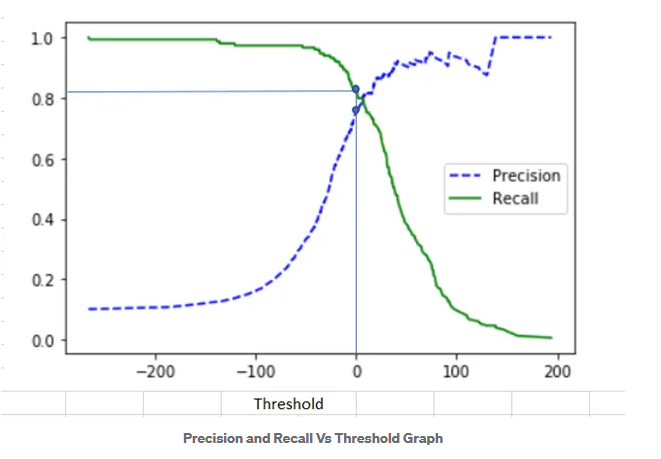

Source: https://medium.com/analytics-vidhya/precision-recall-tradeoff-79e892d43134

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 6.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

Torchmetrics docs: https://pypi.org/project/torchmetrics/

In [215]:
# import torchmetrics
import torchmetrics

# setup metric
torchmetric_accuracy = torchmetrics.classification.Accuracy(task="multiclass",num_classes=4)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)

Summary:
* Using the built in `torchmetrics` accuracy function we were able to validate our accuracy is the same as our custom built accuracy function.